Instructions from: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

Model will look at the 
- Lot Area (sq ft)
- Overall quality (scale from 1-10)
- Overall condition (scale from 1-10)
- Total basement area (in sq ft)
- Num of full bathrooms 
- Num of half bathrooms
- Num of bedrooms above ground
- Num of rooms above ground
- Total num of rooms above ground
- Num of fireplaces
- Garage Area (in sq ft)

of a house. It will then predict if the house price is above the median or not (1 for yes and 0 for no)

In [ ]:
#referd to code in the package 'pandas' with the name pd
import pandas as pd
import sklearn

In [ ]:
#read the csv file
df = pd.read_csv('/content/drive/MyDrive/SureStart/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
#convert the data into arrays
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
#split dataset into input (x), and desired predictions (y)
#done by assigning the first 10 colums of the array to x, and the last colum to y
X = dataset[:,0:10]
Y = dataset[:,10]

In [ ]:
#scale the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#scale input features to [0,1]
X_scale = min_max_scaler.fit_transform(x)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
#split data into training and testing
from sklearn.model_selection import train_test_split

#val_and_test size is 30% of overall dataset
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

#split val_and_test size equally to validation & test set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

Right now, we have six variables for the dataset to use
- X_train(10 input features, 70% of full datset
- X_val (10 input features, 15% of full dataset)
- X_test (10 input features, 15% of full dataset)
- Y_train (1 label, 70% of full dataset)
- Y_val (1 label, 15% of full dataset)
- Y_test (1 label, 15% of full dataset)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


The trianing set has 10222 data points while the validation & test set has 219 data points each. 

X variables have 10 input features, while the Y variable has 1 feature to predict

The data is FINALLY ready!

Now, we want this structure: 

Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation

In [ ]:
from keras import Sequential
from keras.layers import Dense

In [ ]:
#specify our desired structure in the Keras sequential model
model = Sequential([
                    Dense(32, activation='relu', input_shape=(10,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),
])

Step 2: Fill in the best numbers. We have to: 
- Tell the model which algorith we want to use for optimization 
- Tell it what loss function to use
- Tell it what other metrics you want to track apart from the loss function

In [ ]:
model.compile(optimizer = 'sgd', #sgd = Stochastic Gradient Descent, or mini-batch gradient descent
              loss = 'binary_crossentropy', #outputs 0 or 1
              metrics=['accuracy']) #we want to track accuracy

In [ ]:
#training on the data
hist = model.fit(X_train, Y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 15s 18ms/step - loss: 0.6980 - accuracy: 0.4961 - val_loss: 0.6937 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4579 - val_loss: 0.6903 - val_accuracy: 0.5434
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5669 - val_loss: 0.6877 - val_accuracy: 0.5434
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5935 - val_loss: 0.6857 - val_accuracy: 0.5525
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5605 - val_loss: 0.6838 - val_accuracy: 0.5525
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5326 - val_loss: 0.6821 - val_accuracy: 0.5525
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5495 - val_loss: 0.6803 - val_accuracy: 0.5890
Epoch 8/100

In [ ]:
#now, we can try the model on the test set
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9041


0.9041095972061157

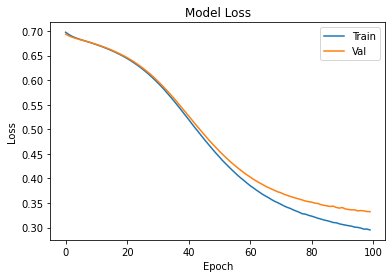

In [29]:
#make some graphs
import matplotlib.pyplot as plt

#we want to visualize the training loss and the validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

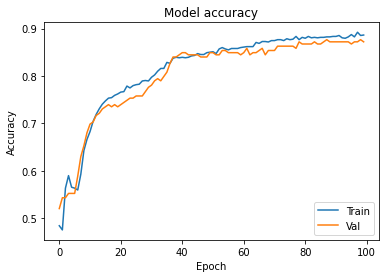

In [34]:
#make a graph to show the training & validation accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [35]:
#Now, we can introduce regularization to our NN
#Let's formulate w/a neural network that will badly overfit on the training set. 

model_2 = Sequential([
                      Dense(1000, activation='relu', input_shape=(10,)),
                      Dense(1000, activation='relu'),
                      Dense(1000, activation='relu'),
                      Dense(1000, activation='relu'),
                      Dense(1, activation='sigmoid'),
                    
])

In [36]:
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [38]:
hist_2 = model_2.fit(X_train, Y_train,
                     batch_size=32, epochs = 100, 
                     validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5469 - accuracy: 0.7081 - val_loss: 0.3979 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3426 - accuracy: 0.8651 - val_loss: 0.3383 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3043 - accuracy: 0.8776 - val_loss: 0.3659 - val_accuracy: 0.8311
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3359 - accuracy: 0.8658 - val_loss: 0.3238 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2541 - accuracy: 0.8861 - val_loss: 0.3655 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3104 - accuracy: 0.8870 - val_loss: 0.3364 - val_accuracy: 0.8402
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2599 - accuracy: 0.8897 - val_loss: 0.3472 - val_accuracy: 0.8767
Epoch 

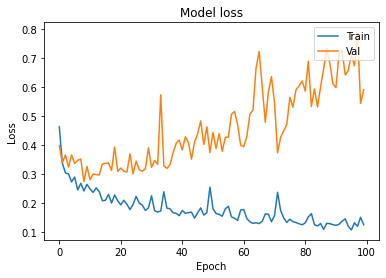

In [39]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

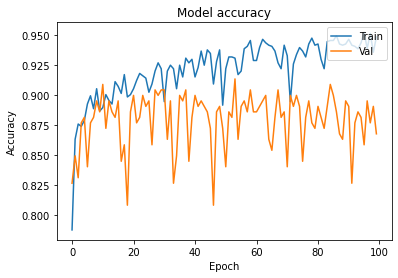

In [40]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Some strategies to reduce overfitting are to incorporate L2 regularization and increase droupout rate

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
#make a 3rd model

model_3 = Sequential([
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01, input_shape = (10,)), 
                      Dropout(0.3),
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                      Dropout(0.3),
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
                      Dropout(0.3),
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
                      Dropout(0.3),
                      Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

Differences between Model 3 and Model 2: 
- To add L2 regularizations, we add this bit of code: kernel_regularizer=regularizers.l2(0.01), 

which tells Keras to incluce the squared values of thos parameters in our overall loss function, and weight them by 0.01 in the loss function

- To add Dropout, add a new layer like: 
Dropout(0.3),

which means that neurons in the previous layer have a probability of 0.3 in dropping out during trining 

In [ ]:
#let's compile the third model and run it with the same parameters as Model 2 (the overfitting one)
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train, Y_train,
                     batch_size=32, epochs=100,
                     validation_data=(X_val, Y_val))

In [ ]:
#plotting the loss and accuracy graphs
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show